In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
appearances = pd.read_csv('appearances.csv')
games = pd.read_csv('games.csv')
club_games = pd.read_csv('club_games.csv')
clubs = pd.read_csv('clubs.csv')
game_events = pd.read_csv('game_events.csv')
player_valuations = pd.read_csv('player_valuations.csv')
game_lineups = pd.read_csv('game_lineups.csv')
players = pd.read_csv('players.csv')

In [3]:
games = games[games['competition_id'] == 'GB1']
games['date'] = pd.to_datetime(games['date'])
games = games[(games['date'] >= '2018-08-01') & (games['date'] <= '2024-12-31')]
games = games.drop(['url','competition_type','round','home_club_name','away_club_name','stadium','aggregate','competition_id','season'],axis=1)
games['attendance'] = games['attendance'].fillna(0)
games

,game_id,date,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,attendance,referee,home_club_formation,away_club_formation
1876,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,24121.0,Chris Kavanagh,3-5-2 flat,4-3-3 Attacking
1877,3050215,2018-09-15,1010,985,1,2,4.0,8.0,Javi Gracia,José Mourinho,20537.0,Mike Dean,4-4-2,4-2-3-1
1878,3050250,2018-10-20,631,985,2,2,3.0,10.0,Maurizio Sarri,José Mourinho,40721.0,Mike Dean,4-3-3 Attacking,4-3-3 Attacking
1879,3050264,2018-10-27,180,762,0,0,16.0,19.0,Mark Hughes,Rafael Benítez,30736.0,Chris Kavanagh,4-4-2 double 6,4-4-2 double 6
1880,3050336,2018-12-15,543,989,2,0,7.0,11.0,Nuno Espírito Santo,Eddie Howe,30997.0,Simon Hooper,3-5-2,3-4-2-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66901,3050278,2018-11-10,603,1237,2,1,18.0,12.0,Neil Warnock,Chris Hughton,29402.0,Martin Atkinson,4-3-3 Attacking,4-2-3-1
66913,3421741,2020-11-01,148,1237,2,1,3.0,16.0,José Mourinho,Graham Potter,0.0,Graham Scott,4-2-3-1,3-5-2 flat
66914,3429714,2021-02-06,1132,1237,1,1,17.0,15.0,Sean Dyche,Graham Potter,0.0,Anthony Taylor,4-4-2 double 6,5-3-2
67152,3429694,2021-01-31,1237,148,1,0,17.0,5.0,Graham Potter,José Mourinho,0.0,Peter Bankes,3-4-2-1,3-4-2-1


In [4]:
game_lineups = game_lineups.drop(['game_lineups_id','player_name','number','date'],axis=1)
game_lineups

,game_id,player_id,club_id,type,position,team_captain
0,2317258,1443,610,substitutes,Defensive Midfield,0
1,2317258,5017,610,starting_lineup,Centre-Back,0
2,2317258,9602,1090,substitutes,Left Winger,0
3,2317258,12282,610,starting_lineup,Left-Back,0
4,2317258,25427,1090,starting_lineup,Right Winger,0
...,...,...,...,...,...,...
2145217,4080529,543771,46,substitutes,Defensive Midfield,0
2145218,4080529,602124,430,substitutes,Central Midfield,0
2145219,4080529,780136,46,substitutes,Defensive Midfield,0
2145220,4080529,969192,46,substitutes,Attacking Midfield,0


In [5]:
appearances = appearances[appearances['competition_id'] == 'GB1']
appearances = appearances.drop(['competition_id','player_current_club_id'],axis=1)
appearances['date'] = pd.to_datetime(appearances['date'])
appearances = appearances[(appearances['date'] >= '2018-08-01') & (appearances['date'] <= '2024-12-31')]
appearances

,appearance_id,game_id,player_id,player_club_id,date,player_name,yellow_cards,red_cards,goals,assists,minutes_played
785591,3050172_10003,3050172,10003,1003,2018-08-10,Wes Morgan,0,0,0,0,90
785592,3050172_118287,3050172,118287,1003,2018-08-10,Rachid Ghezzal,0,0,0,0,27
785593,3050172_122153,3050172,122153,985,2018-08-10,Paul Pogba,0,0,1,0,84
785594,3050172_16911,3050172,16911,1003,2018-08-10,Kasper Schmeichel,0,0,0,0,90
785595,3050172_177907,3050172,177907,1003,2018-08-10,Harry Maguire,0,0,0,0,90
...,...,...,...,...,...,...,...,...,...,...,...
1555966,4095368_468002,4095368,468002,379,2024-03-17,Ben Johnson,0,0,0,0,24
1555967,4095368_503743,4095368,503743,405,2024-03-17,Morgan Rogers,0,0,0,0,63
1555968,4095368_543499,4095368,543499,379,2024-03-17,Mohammed Kudus,1,0,0,0,90
1555969,4095368_649317,4095368,649317,405,2024-03-17,Jhon Durán,0,0,0,0,45


In [6]:
players = players[players['current_club_domestic_competition_id'] == 'GB1']
players = players.drop(['last_season','first_name','last_name','image_url','url','market_value_in_eur','highest_market_value_in_eur','current_club_domestic_competition_id'],axis=1)
players

,player_id,name,current_club_id,player_code,country_of_birth,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_name
7,132,Tomas Rosicky,11,tomas-rosicky,CSSR,Praha,Czech Republic,1980-10-04,Attacking Midfield,Midfield,both,179.0,NaN,NaN,Arsenal Football Club
20,488,Gerhard Tremmel,2288,gerhard-tremmel,Germany,München,Germany,1978-11-16,Goalkeeper,Goalkeeper,NaN,NaN,NaN,NaN,Swansea City
63,1397,Michael Owen,512,michael-owen,England,Chester,England,1979-12-14,Centre-Forward,Attack,both,173.0,NaN,NaN,Stoke City
75,1573,Thomas Hitzlsperger,29,thomas-hitzlsperger,Germany,München,Germany,1982-04-05,Central Midfield,Midfield,NaN,NaN,NaN,NaN,Everton Football Club
113,2514,Bastian Schweinsteiger,985,bastian-schweinsteiger,Germany,Kolbermoor,Germany,1984-08-01,Central Midfield,Midfield,NaN,NaN,NaN,BS Family Office,Manchester United Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30174,1005649,Murillo,703,murillo,Brazil,São Paulo,Brazil,2002-07-04,Centre-Back,Defender,left,184.0,2028-06-30 00:00:00,NaN,Nottingham Forest Football Club
30232,1031256,Callum McFarlane,931,callum-mcfarlane,NaN,NaN,England,2003-09-08,Centre-Forward,Attack,NaN,185.0,NaN,Midas Sports,Fulham Football Club
30315,1060740,Enso González,543,enso-gonzalez,Paraguay,Asunción,Paraguay,2005-01-20,Left Winger,Attack,left,169.0,2029-06-30 00:00:00,NaN,Wolverhampton Wanderers Football Club
30371,1082850,Deivid Washington,631,deivid-washington,Brazil,Itumbiara,Brazil,2005-06-05,Centre-Forward,Attack,right,187.0,2030-06-30 00:00:00,Bertolucci Sports,Chelsea Football Club


In [7]:
player_valuations = player_valuations[player_valuations['player_club_domestic_competition_id'] == 'GB1']
player_valuations = player_valuations[(player_valuations['date'] >= '2018-08-01') & (player_valuations['date'] <= '2024-12-31')]
player_valuations

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
245507,486477,2018-08-01,350000,1010,GB1
245531,346499,2018-08-02,175000,1123,GB1
245563,309180,2018-08-03,750000,1237,GB1
245569,345961,2018-08-03,250000,379,GB1
245944,404842,2018-08-06,500000,29,GB1
...,...,...,...,...,...
465702,867688,2024-03-14,16000000,1237,GB1
465703,922769,2024-03-14,22000000,762,GB1
465704,983989,2024-03-14,18000000,1237,GB1
465705,1005649,2024-03-14,25000000,703,GB1


In [8]:
player_valuations = player_valuations.rename(columns={'date' : 'valuations_date'})
player_valuations

,player_id,valuations_date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
245507,486477,2018-08-01,350000,1010,GB1
245531,346499,2018-08-02,175000,1123,GB1
245563,309180,2018-08-03,750000,1237,GB1
245569,345961,2018-08-03,250000,379,GB1
245944,404842,2018-08-06,500000,29,GB1
...,...,...,...,...,...
465702,867688,2024-03-14,16000000,1237,GB1
465703,922769,2024-03-14,22000000,762,GB1
465704,983989,2024-03-14,18000000,1237,GB1
465705,1005649,2024-03-14,25000000,703,GB1


# EDA 2

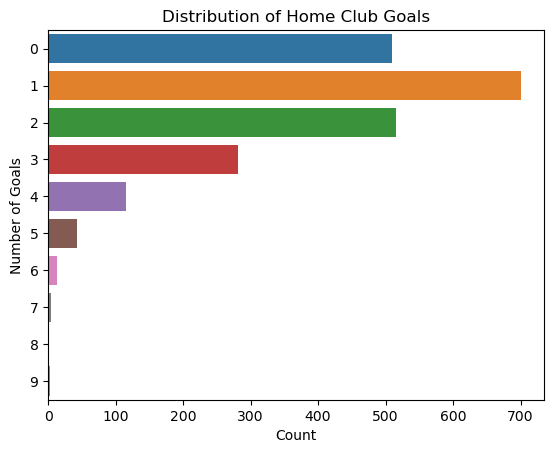

In [9]:
sns.countplot(y='home_club_goals', data=games)

plt.title('Distribution of Home Club Goals')

plt.xlabel('Count')

# y축 레이블 설정 (데이터의 개수이므로 count로 고정)
plt.ylabel('Number of Goals')

# 그래프 출력
plt.show()

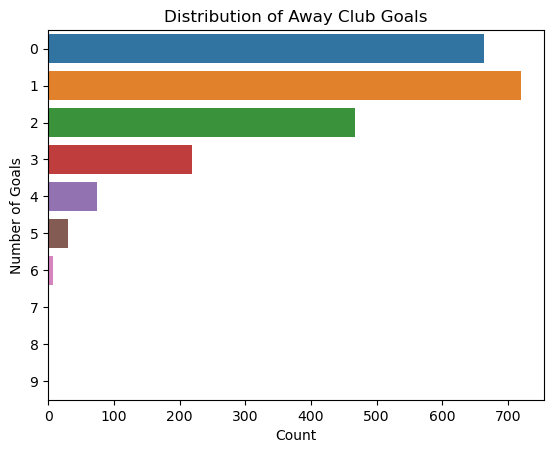

In [10]:
sns.countplot(y='away_club_goals', data=games)

plt.title('Distribution of Away Club Goals')

plt.xlabel('Count')

# y축 레이블 설정 (데이터의 개수이므로 count로 고정)
plt.ylabel('Number of Goals')

# 그래프 출력
plt.show()

In [11]:
game_app = pd.merge(games,appearances,on='game_id')
game_app.columns

Index(['game_id', 'date_x', 'home_club_id', 'away_club_id', 'home_club_goals',
       'away_club_goals', 'home_club_position', 'away_club_position',
       'home_club_manager_name', 'away_club_manager_name', 'attendance',
       'referee', 'home_club_formation', 'away_club_formation',
       'appearance_id', 'player_id', 'player_club_id', 'date_y', 'player_name',
       'yellow_cards', 'red_cards', 'goals', 'assists', 'minutes_played'],
      dtype='object')

In [12]:
game_app['date'] = pd.to_datetime(game_app['date_x'])

In [13]:
# season을 나타내는 함수 정의
def get_season(date):
    year = date.year
    month = date.month
    
    if month >= 8 and month <= 12:
        return year
    elif month >= 1 and month <= 5:
        return year - 1
    else:
        return year - 1
    
# date를 기반으로 season 칼럼 생성
game_app['season'] = game_app['date'].apply(get_season)
game_app

,game_id,date_x,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,...,player_club_id,date_y,player_name,yellow_cards,red_cards,goals,assists,minutes_played,date,season
0,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,...,631,2018-08-11,Jorginho,0,0,1,0,90,2018-08-11,2018
1,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,...,631,2018-08-11,Marcos Alonso,0,0,0,1,90,2018-08-11,2018
2,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,...,1110,2018-08-11,Aaron Mooy,0,0,0,0,90,2018-08-11,2018
3,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,...,631,2018-08-11,Álvaro Morata,0,0,0,0,90,2018-08-11,2018
4,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,...,631,2018-08-11,Ross Barkley,0,0,0,0,68,2018-08-11,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61398,3592240,2022-05-15,148,1132,1,0,4.0,17.0,Antonio Conte,Mike Jackson,...,148,2022-05-15,Emerson Royal,0,0,0,0,90,2022-05-15,2021
61399,3592240,2022-05-15,148,1132,1,0,4.0,17.0,Antonio Conte,Mike Jackson,...,1132,2022-05-15,Dwight McNeil,0,0,0,0,90,2022-05-15,2021
61400,3592240,2022-05-15,148,1132,1,0,4.0,17.0,Antonio Conte,Mike Jackson,...,1132,2022-05-15,Ashley Barnes,0,0,0,0,78,2022-05-15,2021
61401,3592240,2022-05-15,148,1132,1,0,4.0,17.0,Antonio Conte,Mike Jackson,...,148,2022-05-15,Lucas Moura,1,0,0,0,79,2022-05-15,2021


In [14]:
game_app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61403 entries, 0 to 61402
Data columns (total 26 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   game_id                 61403 non-null  int64         
 1   date_x                  61403 non-null  datetime64[ns]
 2   home_club_id            61403 non-null  int64         
 3   away_club_id            61403 non-null  int64         
 4   home_club_goals         61403 non-null  int64         
 5   away_club_goals         61403 non-null  int64         
 6   home_club_position      61403 non-null  float64       
 7   away_club_position      61403 non-null  float64       
 8   home_club_manager_name  61403 non-null  object        
 9   away_club_manager_name  61403 non-null  object        
 10  attendance              61403 non-null  float64       
 11  referee                 61403 non-null  object        
 12  home_club_formation     61403 non-null  object

In [15]:
game_app_play = pd.merge(game_app,players,on='player_id')
game_app_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47780 entries, 0 to 47779
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   game_id                   47780 non-null  int64         
 1   date_x                    47780 non-null  datetime64[ns]
 2   home_club_id              47780 non-null  int64         
 3   away_club_id              47780 non-null  int64         
 4   home_club_goals           47780 non-null  int64         
 5   away_club_goals           47780 non-null  int64         
 6   home_club_position        47780 non-null  float64       
 7   away_club_position        47780 non-null  float64       
 8   home_club_manager_name    47780 non-null  object        
 9   away_club_manager_name    47780 non-null  object        
 10  attendance                47780 non-null  float64       
 11  referee                   47780 non-null  object        
 12  home_club_formatio

In [16]:
game_app_play

,game_id,date_x,home_club_id,away_club_id,home_club_goals,away_club_goals,home_club_position,away_club_position,home_club_manager_name,away_club_manager_name,...,city_of_birth,country_of_citizenship,date_of_birth,sub_position,position,foot,height_in_cm,contract_expiration_date,agent_name,current_club_name
0,3050170,2018-08-11,1110,631,0,3,19.0,2.0,David Wagner,Maurizio Sarri,...,Imbituba,Italy,1991-12-20,Defensive Midfield,Midfield,right,178.0,2024-06-30 00:00:00,Brezilya Agency,Arsenal Football Club
1,3050250,2018-10-20,631,985,2,2,3.0,10.0,Maurizio Sarri,José Mourinho,...,Imbituba,Italy,1991-12-20,Defensive Midfield,Midfield,right,178.0,2024-06-30 00:00:00,Brezilya Agency,Arsenal Football Club
2,3050370,2019-01-12,631,762,2,1,4.0,18.0,Maurizio Sarri,Rafael Benítez,...,Imbituba,Italy,1991-12-20,Defensive Midfield,Midfield,right,178.0,2024-06-30 00:00:00,Brezilya Agency,Arsenal Football Club
3,3429777,2021-03-04,31,631,0,1,8.0,4.0,Jürgen Klopp,Thomas Tuchel,...,Imbituba,Italy,1991-12-20,Defensive Midfield,Midfield,right,178.0,2024-06-30 00:00:00,Brezilya Agency,Arsenal Football Club
4,3429821,2021-04-24,379,631,0,1,5.0,4.0,David Moyes,Thomas Tuchel,...,Imbituba,Italy,1991-12-20,Defensive Midfield,Midfield,right,178.0,2024-06-30 00:00:00,Brezilya Agency,Arsenal Football Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47775,3837999,2022-09-18,1148,11,0,3,8.0,1.0,Thomas Frank,Mikel Arteta,...,London,NaN,2007-03-21,Attacking Midfield,Midfield,left,165.0,2025-06-30 00:00:00,NaN,Arsenal Football Club
47776,3838276,2023-01-04,873,148,0,4,12.0,5.0,Patrick Vieira,Antonio Conte,...,Maidstone,NaN,2001-09-19,Defensive Midfield,Midfield,left,168.0,2024-06-30 00:00:00,NaN,Tottenham Hotspur Football Club
47777,3838599,2023-05-28,399,148,1,4,19.0,8.0,Sam Allardyce,Ryan Mason,...,London,Scotland,2003-04-16,Defensive Midfield,Midfield,NaN,NaN,2026-06-30 00:00:00,Concilium Sport,Tottenham Hotspur Football Club
47778,3838599,2023-05-28,399,148,1,4,19.0,8.0,Sam Allardyce,Ryan Mason,...,London,England,2005-08-17,Defensive Midfield,Midfield,right,175.0,NaN,NaN,Tottenham Hotspur Football Club


In [17]:
game_app['player_name'].unique()

array(['Jorginho', 'Marcos Alonso', 'Aaron Mooy', ..., 'George Abbott',
       'Andrey Santos', 'Nathan Broadhead'], dtype=object)

In [18]:
rating_df = game_app[['game_id','player_name','yellow_cards','red_cards','goals','assists','minutes_played','season']]
rating_df

,game_id,player_name,yellow_cards,red_cards,goals,assists,minutes_played,season
0,3050170,Jorginho,0,0,1,0,90,2018
1,3050170,Marcos Alonso,0,0,0,1,90,2018
2,3050170,Aaron Mooy,0,0,0,0,90,2018
3,3050170,Álvaro Morata,0,0,0,0,90,2018
4,3050170,Ross Barkley,0,0,0,0,68,2018
...,...,...,...,...,...,...,...,...
61398,3592240,Emerson Royal,0,0,0,0,90,2021
61399,3592240,Dwight McNeil,0,0,0,0,90,2021
61400,3592240,Ashley Barnes,0,0,0,0,78,2021
61401,3592240,Lucas Moura,1,0,0,0,79,2021


**점수 계산**
- 골(2점), 어시(1.5점), 옐로카드(-0.5점), 레드카드(-1점)
- 경기 시간 : 경기 동안 팀에 얼마나 기여했는지 

In [19]:
def calculate_rating(goals, assists, yellow_cards, red_cards, minutes_played):
    rating = goals * 2 + assists * 1.5 - yellow_cards * 0.5 - red_cards * 1 + (minutes_played / 90)
    return round(rating, 2)

# 각 선수의 평점 계산
rating_df['rating'] = rating_df.apply(lambda x: calculate_rating(x['goals'], x['assists'], x['yellow_cards'], x['red_cards'], x['minutes_played']), axis=1)

# 결과 출력
rating_df[['player_name', 'rating']]

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_18055/3821530283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_df['rating'] = rating_df.apply(lambda x: calculate_rating(x['goals'], x['assists'], x['yellow_cards'], x['red_cards'], x['minutes_played']), axis=1)


,player_name,rating
0,Jorginho,3.00
1,Marcos Alonso,2.50
2,Aaron Mooy,1.00
3,Álvaro Morata,1.00
4,Ross Barkley,0.76
...,...,...
61398,Emerson Royal,1.00
61399,Dwight McNeil,1.00
61400,Ashley Barnes,0.87
61401,Lucas Moura,0.38


In [20]:
rating_df

,game_id,player_name,yellow_cards,red_cards,goals,assists,minutes_played,season,rating
0,3050170,Jorginho,0,0,1,0,90,2018,3.00
1,3050170,Marcos Alonso,0,0,0,1,90,2018,2.50
2,3050170,Aaron Mooy,0,0,0,0,90,2018,1.00
3,3050170,Álvaro Morata,0,0,0,0,90,2018,1.00
4,3050170,Ross Barkley,0,0,0,0,68,2018,0.76
...,...,...,...,...,...,...,...,...,...
61398,3592240,Emerson Royal,0,0,0,0,90,2021,1.00
61399,3592240,Dwight McNeil,0,0,0,0,90,2021,1.00
61400,3592240,Ashley Barnes,0,0,0,0,78,2021,0.87
61401,3592240,Lucas Moura,1,0,0,0,79,2021,0.38


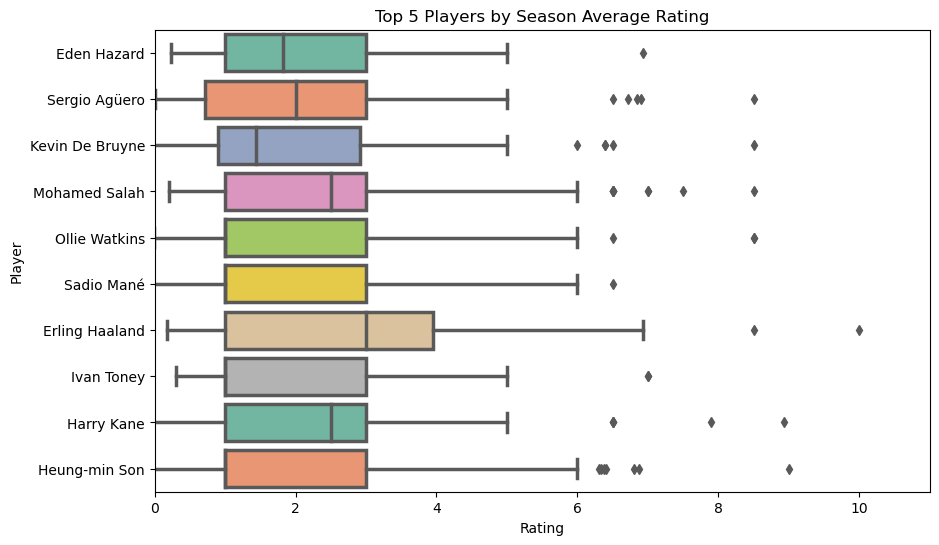

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 선수별 시즌당 평균 점수 계산
player_avg_ratings = rating_df.groupby('player_name')['rating'].mean().sort_values(ascending=False)

# 상위 10명의 선수 선택
top_players = player_avg_ratings.head(10)

# 선택된 선수들의 데이터 추출
selected_players_data = rating_df[rating_df['player_name'].isin(top_players.index)]

# 박스 플롯 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='player_name', data=selected_players_data, orient='h', palette='Set2', linewidth=2.5)
plt.title('Top 5 Players by Season Average Rating')
plt.xlabel('Rating')
plt.ylabel('Player')
plt.xlim(0, 11)  # 등급 범위에 따라 조정
plt.show()

In [22]:
# 가장 높은 점수를 받았던 경기 ID 가져오기
top_game_ids = selected_players_data.groupby('player_name')['rating'].idxmax().tolist()
top_game_ids

# 가장 높은 점수를 받았던 경기의 정보 가져오기
top_games_info = rating_df.loc[top_game_ids, ['game_id', 'player_name', 'rating']]
top_games_info

,game_id,player_name,rating
3793,3050208,Eden Hazard,6.93
50375,3838015,Erling Haaland,10.00
43685,3420846,Harry Kane,8.93
43709,3420846,Heung-min Son,9.00
19989,3837973,Ivan Toney,7.00
54416,3592282,Kevin De Bruyne,8.50
30289,3592048,Mohamed Salah,8.50
624,3421704,Ollie Watkins,8.50
42347,3592191,Sadio Mané,6.50
49317,3219260,Sergio Agüero,8.50


In [23]:
top_games_results = game_app.loc[top_game_ids, ['date', 'player_name', 'goals', 'assists','home_club_goals','away_club_goals','referee','minutes_played']]
top_games_results

,date,player_name,goals,assists,home_club_goals,away_club_goals,referee,minutes_played
3793,2018-09-15,Eden Hazard,3,0,4,1,Jonathan Moss,84
50375,2022-10-02,Erling Haaland,3,2,6,3,Michael Oliver,90
43685,2020-09-20,Harry Kane,1,4,2,5,David Coote,84
43709,2020-09-20,Heung-min Son,4,0,2,5,David Coote,90
19989,2022-09-03,Ivan Toney,3,0,5,2,Robert Jones,90
54416,2022-05-11,Kevin De Bruyne,4,0,1,5,Martin Atkinson,90
30289,2021-10-24,Mohamed Salah,3,1,0,5,Anthony Taylor,90
624,2020-10-04,Ollie Watkins,3,1,7,2,Martin Atkinson,90
42347,2022-02-23,Sadio Mané,2,1,6,0,Michael Oliver,90
49317,2020-01-12,Sergio Agüero,3,1,1,6,Jonathan Moss,90


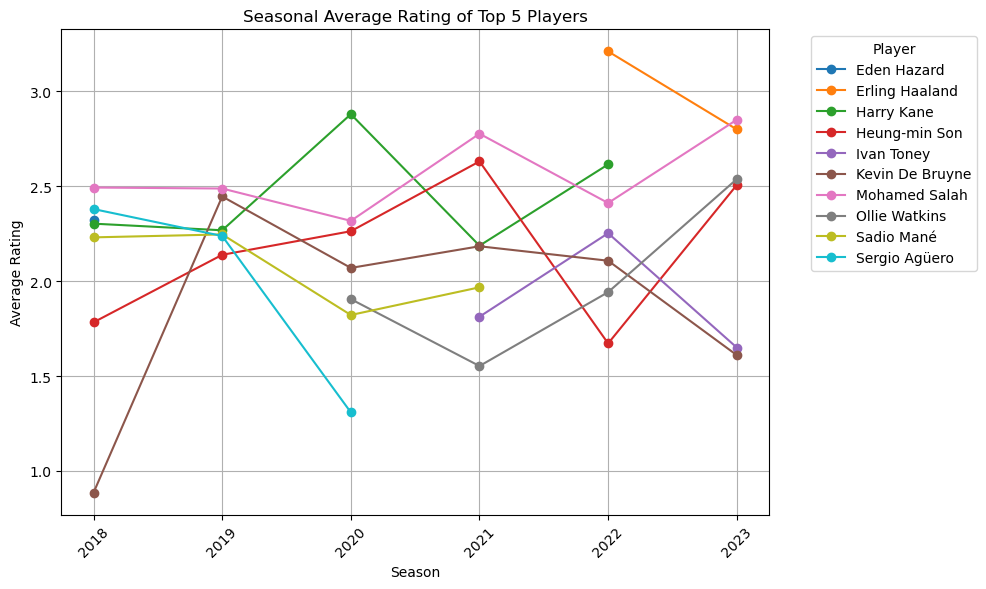

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 상위 10명의 선수 선택
top_players = player_avg_ratings.head(10)

# 선택된 선수들의 데이터 추출
selected_players_data = rating_df[rating_df['player_name'].isin(top_players.index)]

# 각 선수의 시즌별 평균 점수 계산
season_avg_ratings = selected_players_data.groupby(['season', 'player_name'])['rating'].mean().unstack()

# 시즌별 평균 점수 그래프로 시각화
season_avg_ratings.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Seasonal Average Rating of Top 5 Players')
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.legend(title='Player', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [25]:
hm_rate = rating_df[rating_df['player_name'] == 'Heung-min Son']
hm_rate

,game_id,player_name,yellow_cards,red_cards,goals,assists,minutes_played,season,rating
3360,3219136,Heung-min Son,0,0,1,0,90,2019,3.00
3498,3429867,Heung-min Son,0,0,0,0,90,2020,1.00
3611,3838204,Heung-min Son,0,0,0,0,90,2022,1.00
4090,3592008,Heung-min Son,0,0,0,1,90,2021,2.50
4116,3592253,Heung-min Son,0,0,1,0,76,2021,2.84
...,...,...,...,...,...,...,...,...,...
61127,4095253,Heung-min Son,0,0,1,0,90,2023,3.00
61183,4095349,Heung-min Son,0,0,1,0,90,2023,3.00
61323,3421741,Heung-min Son,0,0,0,0,85,2020,0.94
61376,3429694,Heung-min Son,0,0,0,0,90,2020,1.00


/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


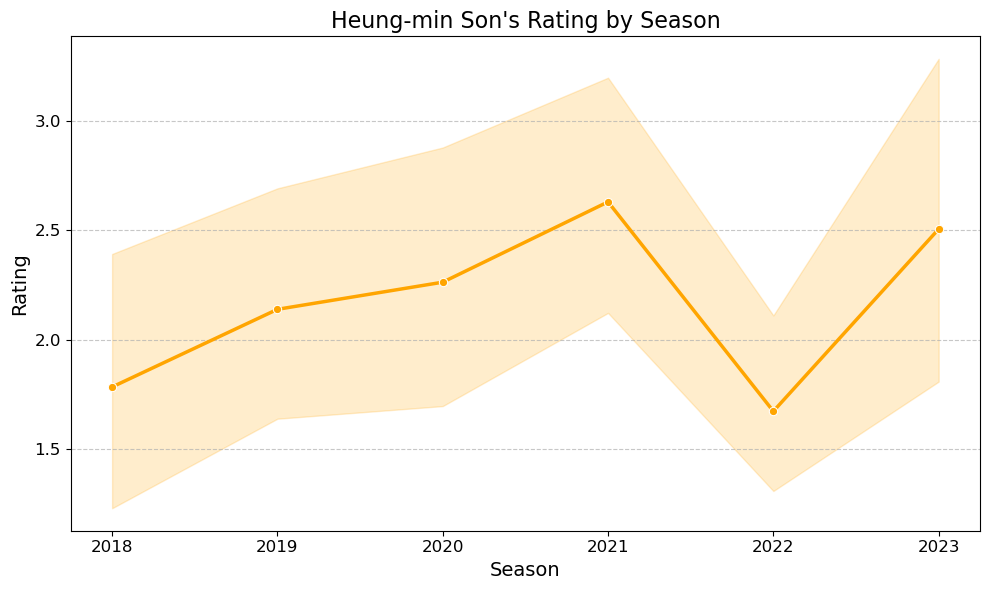

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='season', y='rating', data=hm_rate, marker='o', color='orange', linewidth=2.5)
plt.title('Heung-min Son\'s Rating by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 굵은 선 : 실제 데이터 포인트 시즌별 평균
# 옅게 칠해진 영역 : 데이터 신뢰구간. 데이터의 변동성을 나타냄.

In [27]:
df = pd.read_csv('FBREF_PL - final.csv')
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Blocks,NaN,NaN,NaN,NaN,NaN,NaN
1,Season,Team,Date,Time,Round,Day,Venue,Result,GF,GA,...,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
2,1819,Arsenal,2018-08-12,16:00 (00:00),Matchweek 1,Sun,Home,L,0,2,...,15,40,9,13,3,10,12,34,24,1
3,1819,Arsenal,2018-08-18,17:30 (01:30),Matchweek 2,Sat,Away,L,2,3,...,12,25,9,12,6,6,12,26,23,2
4,1819,Arsenal,2018-08-25,15:00 (23:00),Matchweek 3,Sat,Home,W,3,1,...,24,29.2,17,14,3,11,6,21,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2637,2324,Brighton & Hove Albion,2024-02-24,15:00 (00:00),Matchweek 26,Sat,Home,D,1,1,...,16,25,12,6,2,4,4,20,12,0
2638,2324,Brighton & Hove Albion,2024-03-02,15:00 (00:00),Matchweek 27,Sat,Away,L,0,3,...,15,73.3,4,15,3,12,8,24,12,3
2639,2324,Brighton & Hove Albion,2024-03-10,14:00 (23:00),Matchweek 28,Sun,Home,W,1,0,...,13,38.5,8,9,1,8,5,14,19,1
2640,2324,Brighton & Hove Albion,2024-03-31,14:00 (22:00),Matchweek 30,Sun,Away,L,1,2,...,25,60,10,18,10,8,9,37,23,0


In [28]:
arsenal = pd.read_csv('FBREF_PL - Arsenal.csv')
arsenal

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87,Unnamed: 88
0,NaN,For Arsenal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Blocks,NaN,NaN,NaN,NaN,NaN,NaN
1,Season,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,...,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
2,1819,2018-08-12,16:00 (00:00),Matchweek 1,Sun,Home,L,0,2,Manchester City,...,15,40,9,13,3,10,12,34,24,1
3,1819,2018-08-18,17:30 (01:30),Matchweek 2,Sat,Away,L,2,3,Chelsea,...,12,25,9,12,6,6,12,26,23,2
4,1819,2018-08-25,15:00 (23:00),Matchweek 3,Sat,Home,W,3,1,West Ham,...,24,29.2,17,14,3,11,6,21,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2324,2024-02-24,20:00 (05:00),Matchweek 26,Sat,Home,W,4,1,Newcastle Utd,...,12,41.7,7,12,0,12,9,20,7,0
218,2324,2024-03-04,20:00 (05:00),Matchweek 27,Mon,Away,W,6,0,Sheffield Utd,...,7,71.4,2,4,1,3,4,11,7,0
219,2324,2024-03-09,17:30 (02:30),Matchweek 28,Sat,Home,W,2,1,Brentford,...,2,100,0,11,3,8,2,10,8,1
220,2324,2024-03-31,16:30 (00:30),Matchweek 30,Sun,Away,D,0,0,Manchester City,...,26,23.1,20,14,4,10,5,25,28,0


In [29]:
arsenal.columns = arsenal.iloc[0]

arsenal = arsenal.drop(0)
arsenal = arsenal.reset_index(drop=True)

In [30]:
arsenal.columns = arsenal.iloc[0]
arsenal = arsenal.drop([0])
arsenal

,Season,Date,Time,Round,Day,Venue,Result,GF,GA,Opponent,...,Att,Tkl%,Lost,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err
1,1819,2018-08-12,16:00 (00:00),Matchweek 1,Sun,Home,L,0,2,Manchester City,...,15,40,9,13,3,10,12,34,24,1
2,1819,2018-08-18,17:30 (01:30),Matchweek 2,Sat,Away,L,2,3,Chelsea,...,12,25,9,12,6,6,12,26,23,2
3,1819,2018-08-25,15:00 (23:00),Matchweek 3,Sat,Home,W,3,1,West Ham,...,24,29.2,17,14,3,11,6,21,26,1
4,1819,2018-09-02,13:30 (21:30),Matchweek 4,Sun,Away,W,3,2,Cardiff City,...,4,50,2,6,1,5,11,22,23,2
5,1819,2018-09-15,15:00 (23:00),Matchweek 5,Sat,Away,W,2,1,Newcastle Utd,...,6,50,3,7,2,5,7,22,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2324,2024-02-24,20:00 (05:00),Matchweek 26,Sat,Home,W,4,1,Newcastle Utd,...,12,41.7,7,12,0,12,9,20,7,0
217,2324,2024-03-04,20:00 (05:00),Matchweek 27,Mon,Away,W,6,0,Sheffield Utd,...,7,71.4,2,4,1,3,4,11,7,0
218,2324,2024-03-09,17:30 (02:30),Matchweek 28,Sat,Home,W,2,1,Brentford,...,2,100,0,11,3,8,2,10,8,1
219,2324,2024-03-31,16:30 (00:30),Matchweek 30,Sun,Away,D,0,0,Manchester City,...,26,23.1,20,14,4,10,5,25,28,0


In [31]:
arsenal.columns

Index(['Season', 'Date', 'Time', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Opponent', 'Gls', 'Sh', 'SoT', 'SoT%', 'G/Sh', 'G/SoT', 'Dist', 'FK',
       'PK', 'PKatt', 'xG', 'npxG', 'npxG/Sh', 'G-xG', 'np:G-xG', 'SoTA', 'GA',
       'Saves', 'Save%', 'CS', 'PSxG', 'PSxG+/-', 'PKatt', 'PKA', 'PKsv',
       'PKm', 'Cmp', 'Att', 'Cmp%', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen',
       'Att', 'Launch%', 'AvgLen', 'Opp', 'Stp', 'Stp%', '#OPA', 'AvgDist',
       'Cmp', 'Att', 'Cmp%', 'TotDist', 'PrgDist', 'Cmp', 'Att', 'Cmp%', 'Cmp',
       'Att', 'Cmp%', 'Cmp', 'Att', 'Cmp%', 'Ast', 'xAG', 'xA', 'KP', '1/3',
       'PPA', 'CrsPA', 'PrgP', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl', 'Att', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int', 'Tkl+Int',
       'Clr', 'Err'],
      dtype='object', name=0)